In [75]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.datasets import load_diabetes,fetch_california_housing
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
data = fetch_california_housing()

In [77]:
y = data.target
X = data.data
feature_names = data.feature_names
X_frame = pd.DataFrame(X, columns=feature_names)

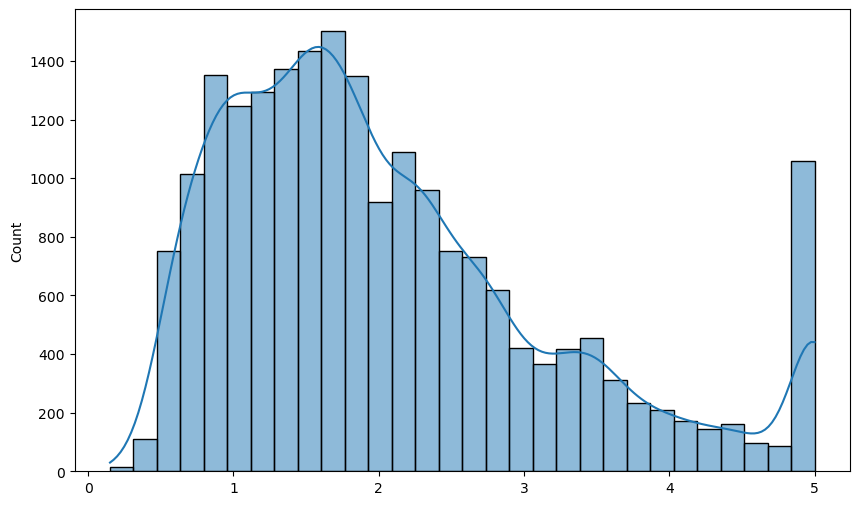

In [78]:
plt.figure(figsize=(10, 6))
sns.histplot(y, bins=30, kde=True)
plt.show()

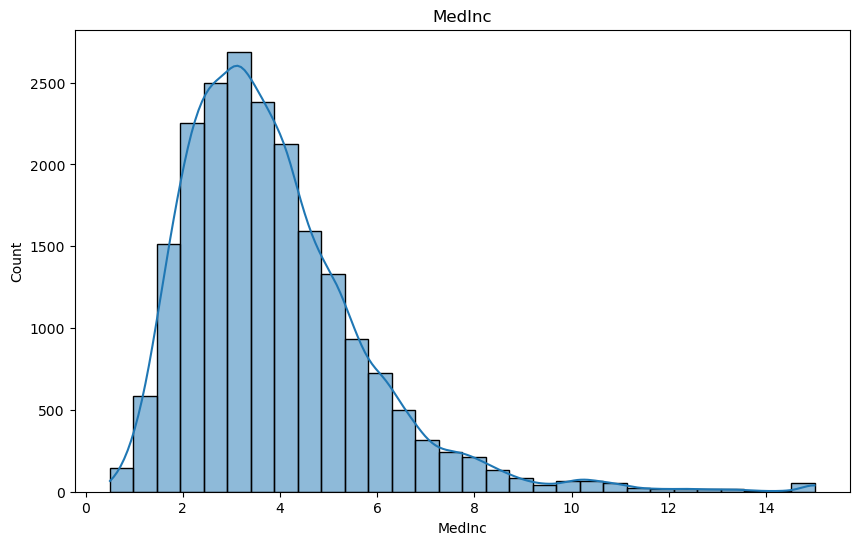

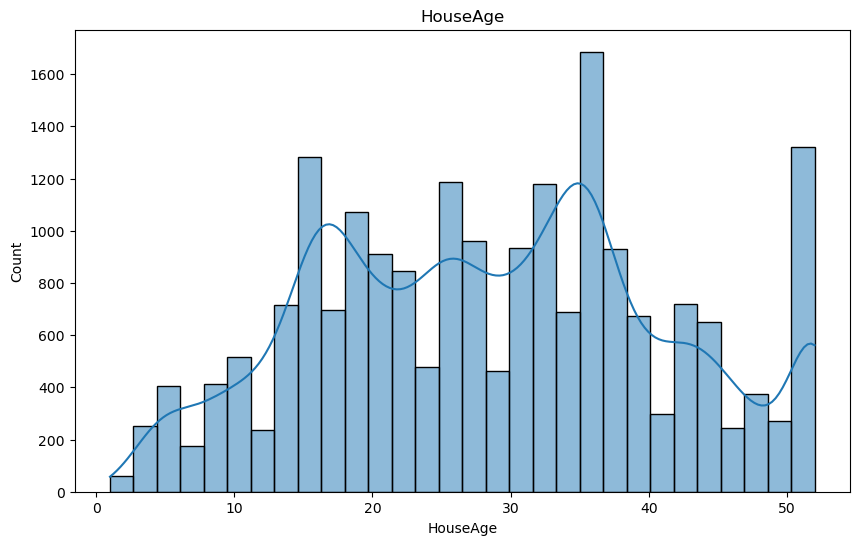

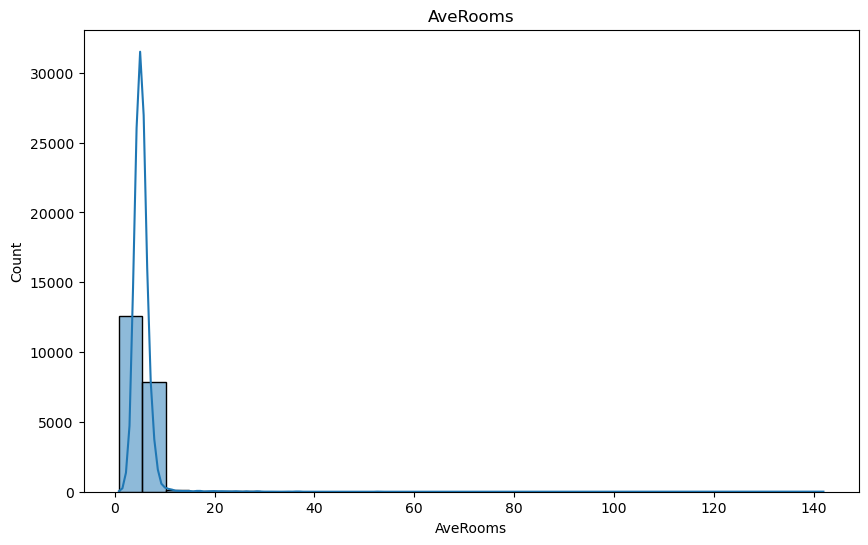

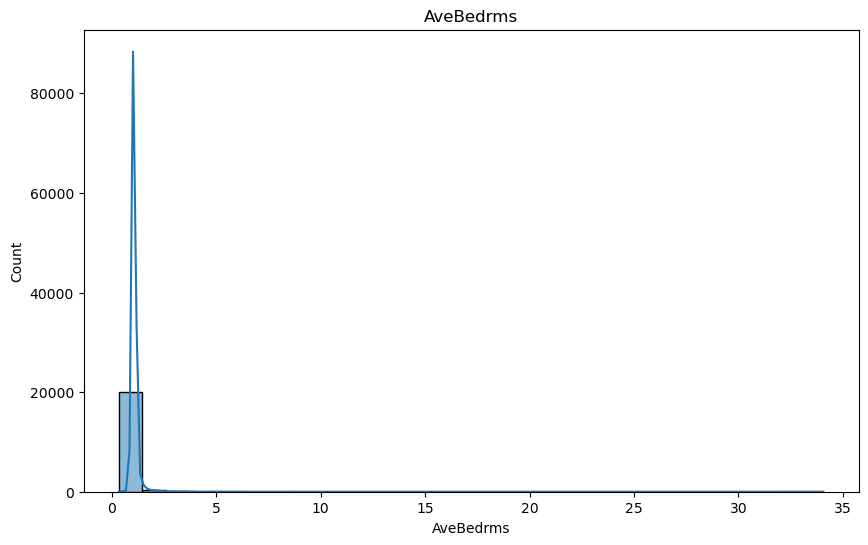

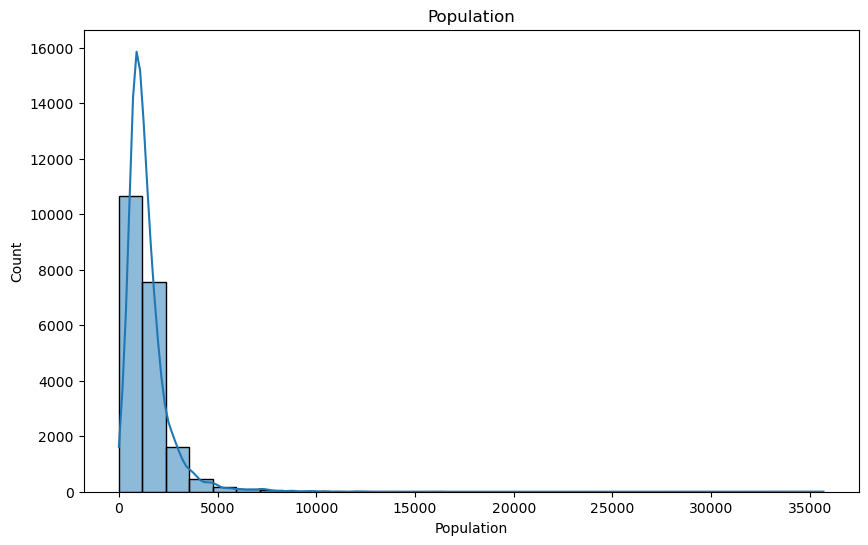

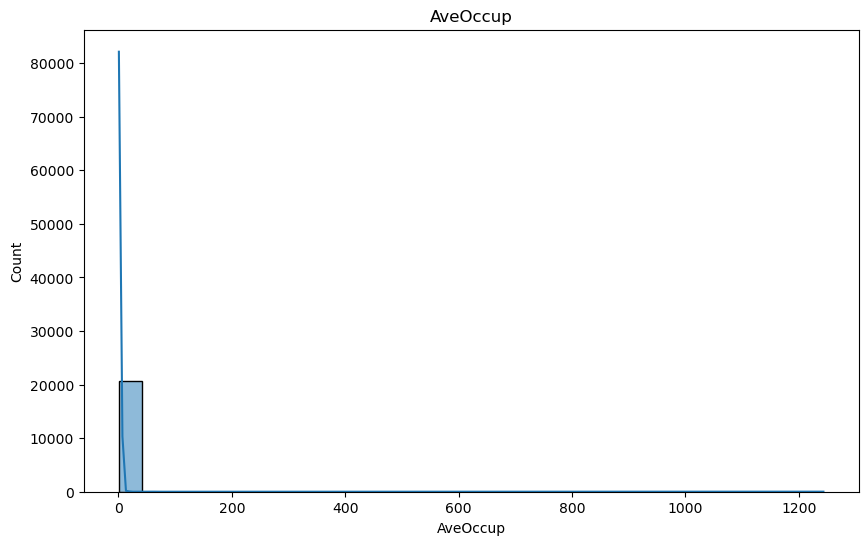

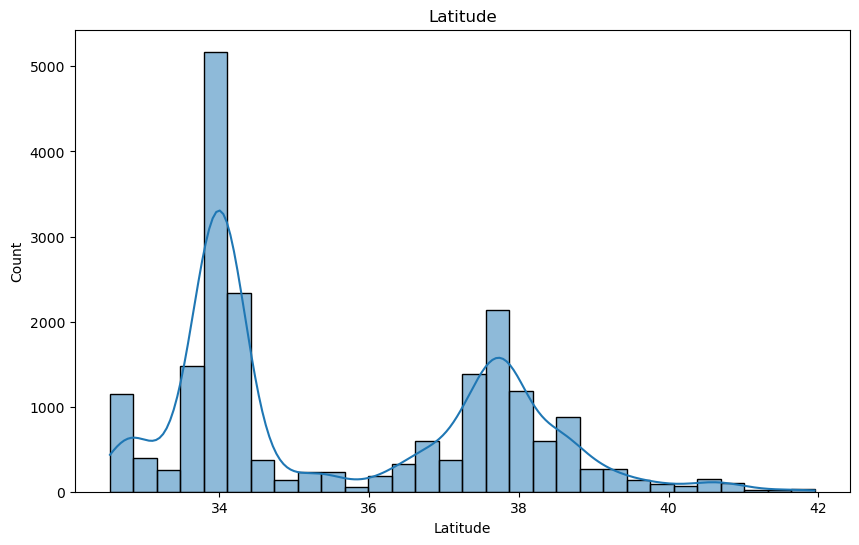

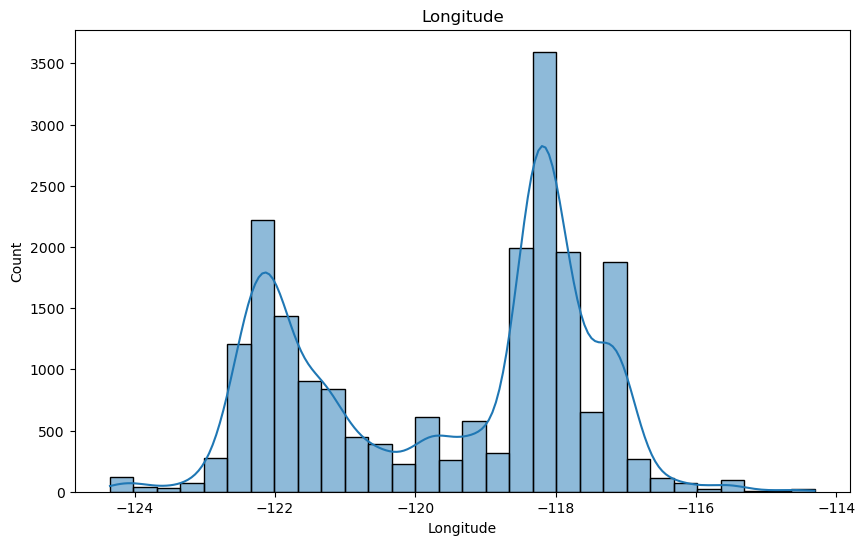

In [79]:
for feature in feature_names:
    plt.figure(figsize=(10, 6))
    sns.histplot(X_frame[feature], bins=30, kde=True)
    plt.title(feature)
    plt.show()

In [36]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

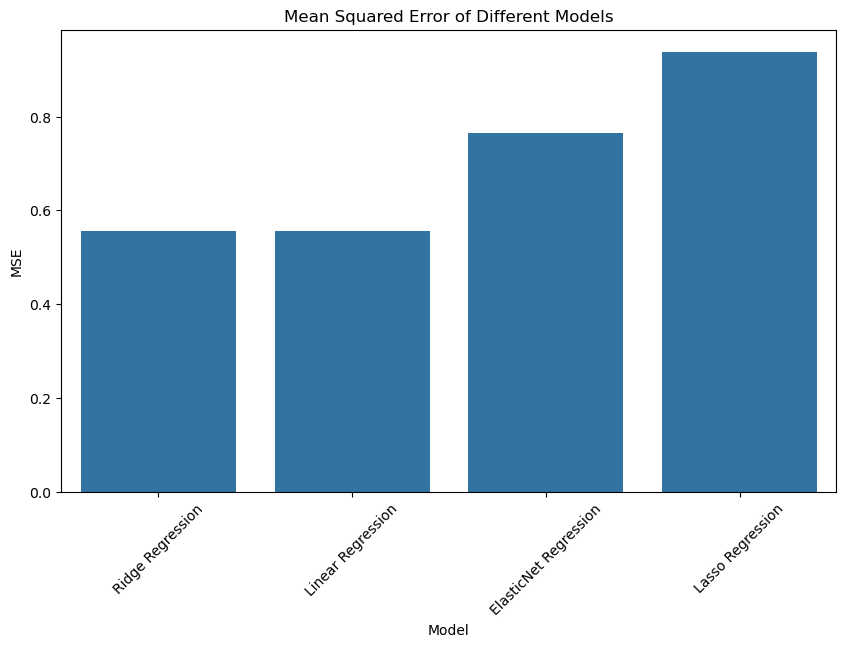

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse
models = {
    'Linear Regression': LinearRegression(),
    'Lasso Regression': Lasso(),
    'Ridge Regression': Ridge(),
    'ElasticNet Regression': ElasticNet()
}
mse_results = {}
for name, model in models.items():
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[name] = mse
mse_df = pd.DataFrame(mse_results, index=[0])
mse_df = mse_df.T
mse_df.columns = ['MSE']
mse_df = mse_df.sort_values(by='MSE')
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_df.index, y='MSE', data=mse_df)
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.title('Mean Squared Error of Different Models')
plt.show()

In [38]:
mse_df.index

Index(['Linear Regression', 'Ridge Regression', 'Lasso Regression',
       'ElasticNet Regression'],
      dtype='object')

In [85]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

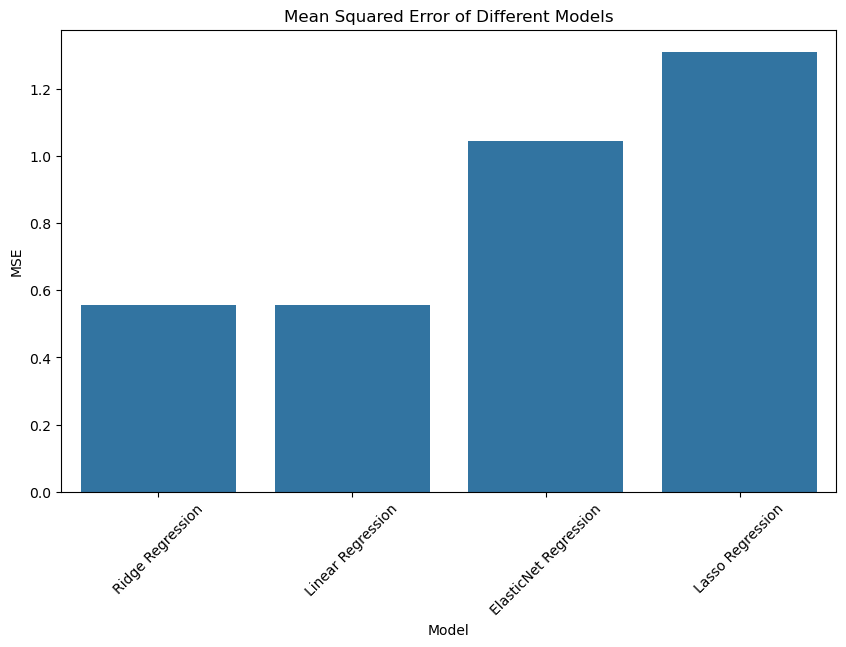

In [86]:


def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
}
mse_results = {}
for name, model in models.items():
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[name] = mse
mse_df = pd.DataFrame(mse_results, index=[0])
mse_df = mse_df.T
mse_df.columns = ["MSE"]
mse_df = mse_df.sort_values(by="MSE")
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_df.index, y="MSE", data=mse_df)
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.title("Mean Squared Error of Different Models")
plt.show()


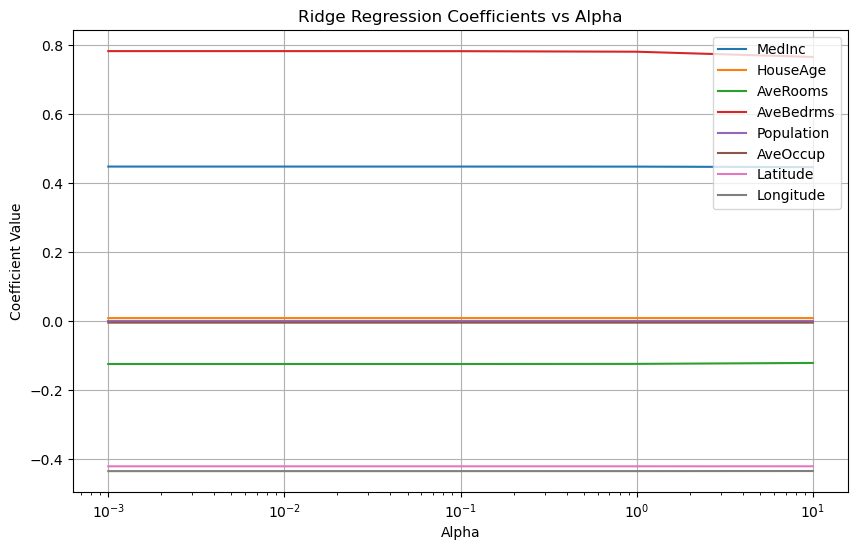

In [81]:
alpha_vals = [10 ** i for i in range(-3, 2)]
mse_results = {}
ridge_models = []

for alpha in alpha_vals:
    model = Ridge(alpha=alpha)
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[alpha] = mse
    ridge_models.append(model)
    
coefs = {"Alpha": [], "Coefficients": []}
for alpha, model in zip(alpha_vals, ridge_models):
    coefs["Alpha"].append(alpha)
    coefs["Coefficients"].append(model.coef_)  
    
coefs_df = pd.DataFrame(coefs)
coefs_df = coefs_df.set_index('Alpha')
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.plot(coefs_df.index, [c[i] for c in coefs_df["Coefficients"]], label=feature)
plt.xscale('log')
plt.legend()
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression Coefficients vs Alpha')
plt.grid(True)

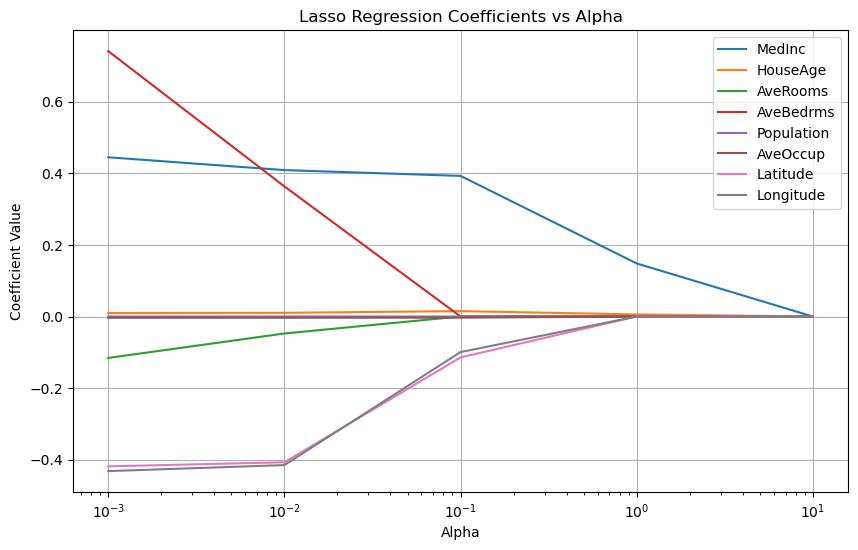

In [82]:
alpha_vals = [10**i for i in range(-3, 2)]
mse_results = {}
ridge_models = []

for alpha in alpha_vals:
    model = Lasso(alpha=alpha)
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[alpha] = mse
    ridge_models.append(model)

coefs = {"Alpha": [], "Coefficients": []}
for alpha, model in zip(alpha_vals, ridge_models):
    coefs["Alpha"].append(alpha)
    coefs["Coefficients"].append(model.coef_)

coefs_df = pd.DataFrame(coefs)
coefs_df = coefs_df.set_index("Alpha")
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.plot(coefs_df.index, [c[i] for c in coefs_df["Coefficients"]], label=feature)
plt.xscale("log")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Coefficients vs Alpha")
plt.grid(True)


In [41]:
X_frame.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000


In [44]:
import numpy as np

In [64]:
X_frame["s7"] = X_frame["s6"] + np.random.normal(0, 0.05, size=X_frame.shape[0])
X_frame.corr(numeric_only= True)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.242491
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.149625
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.253823
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.224165
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.244729
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.222562
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.141525
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.277985
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.280675
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.656852


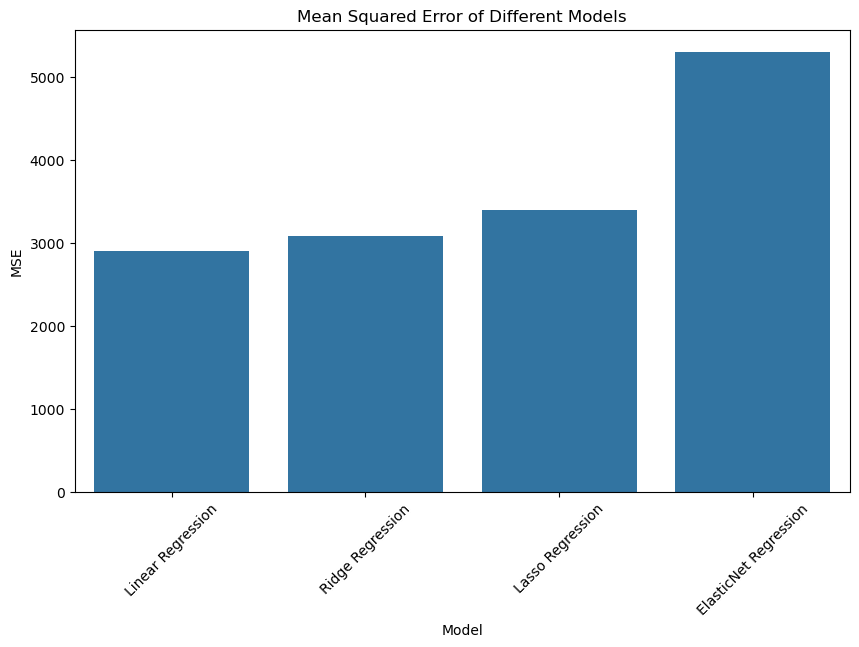

In [65]:
X_train, X_test, y_train, y_test = train_test_split(
    X_frame, y, test_size=0.2, random_state=42
)


def fit_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "ElasticNet Regression": ElasticNet(),
}
mse_results = {}
for name, model in models.items():
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[name] = mse
mse_df = pd.DataFrame(mse_results, index=[0])
mse_df = mse_df.T
mse_df.columns = ["MSE"]
mse_df = mse_df.sort_values(by="MSE")
plt.figure(figsize=(10, 6))
sns.barplot(x=mse_df.index, y="MSE", data=mse_df)
plt.xlabel("Model")
plt.xticks(rotation=45)
plt.title("Mean Squared Error of Different Models")
plt.show()


In [70]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,s7
17,0.070769,0.050680,0.012117,0.056301,0.034206,0.049416,-0.039719,0.034309,0.027364,-0.001078,-0.015936
66,-0.009147,0.050680,-0.018062,-0.033213,-0.020832,0.012152,-0.072854,0.071210,0.000272,0.019633,0.009321
137,0.005383,-0.044642,0.049840,0.097615,-0.015328,-0.016345,-0.006584,-0.002592,0.017036,-0.013504,0.066641
245,-0.027310,-0.044642,-0.035307,-0.029770,-0.056607,-0.058620,0.030232,-0.039493,-0.049872,-0.129483,-0.165431
31,-0.023677,-0.044642,-0.065486,-0.081413,-0.038720,-0.053610,0.059685,-0.076395,-0.037129,-0.042499,-0.027301


In [72]:
feature_names = X_frame.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 's7'], dtype='object')


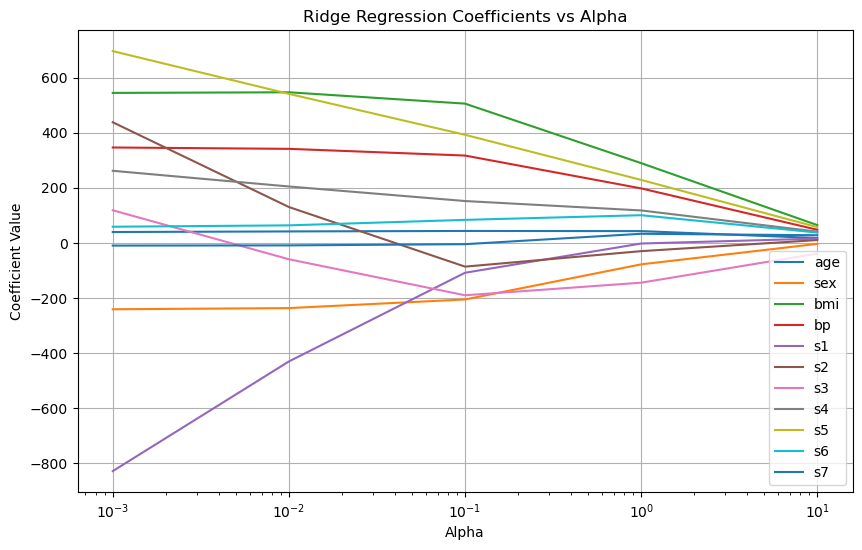

In [73]:
alpha_vals = [10**i for i in range(-3, 2)]
mse_results = {}
ridge_models = []

for alpha in alpha_vals:
    model = Ridge(alpha=alpha)
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[alpha] = mse
    ridge_models.append(model)

coefs = {"Alpha": [], "Coefficients": []}
for alpha, model in zip(alpha_vals, ridge_models):
    coefs["Alpha"].append(alpha)
    coefs["Coefficients"].append(model.coef_)

coefs_df = pd.DataFrame(coefs)
coefs_df = coefs_df.set_index("Alpha")
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.plot(coefs_df.index, [c[i] for c in coefs_df["Coefficients"]], label=feature)
plt.xscale("log")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Ridge Regression Coefficients vs Alpha")
plt.grid(True)
print(X_train.columns)


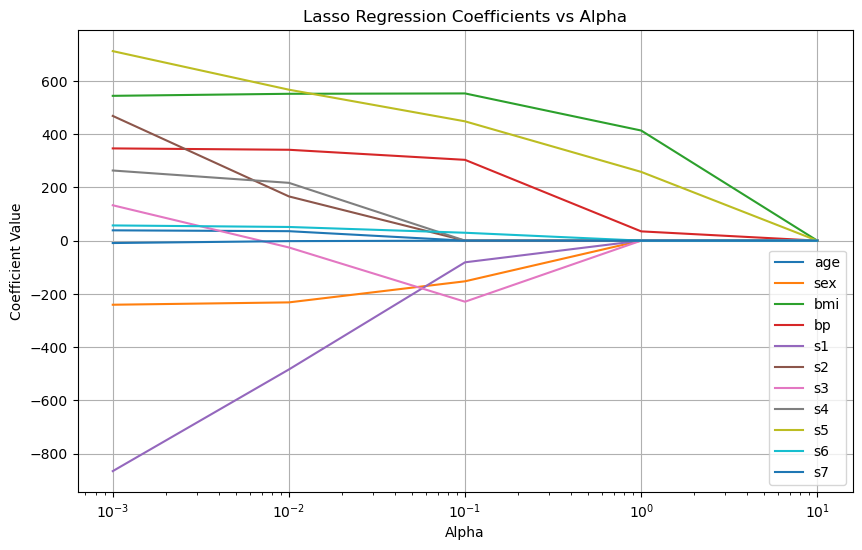

In [74]:
alpha_vals = [10**i for i in range(-3, 2)]
mse_results = {}
ridge_models = []

for alpha in alpha_vals:
    model = Lasso(alpha=alpha)
    mse = fit_and_evaluate(model, X_train, y_train, X_test, y_test)
    mse_results[alpha] = mse
    ridge_models.append(model)

coefs = {"Alpha": [], "Coefficients": []}
for alpha, model in zip(alpha_vals, ridge_models):
    coefs["Alpha"].append(alpha)
    coefs["Coefficients"].append(model.coef_)

coefs_df = pd.DataFrame(coefs)
coefs_df = coefs_df.set_index("Alpha")
plt.figure(figsize=(10, 6))
for i, feature in enumerate(feature_names):
    plt.plot(coefs_df.index, [c[i] for c in coefs_df["Coefficients"]], label=feature)
plt.xscale("log")
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Coefficient Value")
plt.title("Lasso Regression Coefficients vs Alpha")
plt.grid(True)
